In [8]:
import torch
import torchvision

In [26]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [11]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [12]:
example_data.shape

torch.Size([1000, 1, 28, 28])

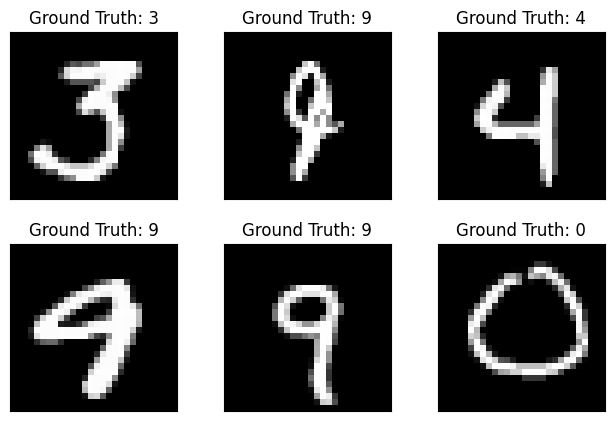

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

In [14]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [67]:
train_losses = []
train_counter = []

In [71]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 16) 
        self.layer2 = nn.Linear(16, 16)  
        self.layer3 = nn.Linear(16, 10)   
        self.activation = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

In [ ]:
def train(model, train_loader, optimizer, loss_fn, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [72]:
model = NN()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
train(model,train_loader, optimizer, loss_fn, n_epochs)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.302326
Train Epoch: 3 [640/60000 (1%)]	Loss: 1.347064
Train Epoch: 3 [1280/60000 (2%)]	Loss: 0.701262
Train Epoch: 3 [1920/60000 (3%)]	Loss: 0.786762
Train Epoch: 3 [2560/60000 (4%)]	Loss: 0.607135
Train Epoch: 3 [3200/60000 (5%)]	Loss: 0.628272
Train Epoch: 3 [3840/60000 (6%)]	Loss: 0.428499
Train Epoch: 3 [4480/60000 (7%)]	Loss: 0.420953
Train Epoch: 3 [5120/60000 (9%)]	Loss: 0.466333
Train Epoch: 3 [5760/60000 (10%)]	Loss: 0.332454
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.572877
Train Epoch: 3 [7040/60000 (12%)]	Loss: 0.359541
Train Epoch: 3 [7680/60000 (13%)]	Loss: 0.250146
Train Epoch: 3 [8320/60000 (14%)]	Loss: 0.346083
Train Epoch: 3 [8960/60000 (15%)]	Loss: 0.252028
Train Epoch: 3 [9600/60000 (16%)]	Loss: 0.238104
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.451139
Train Epoch: 3 [10880/60000 (18%)]	Loss: 0.388897
Train Epoch: 3 [11520/60000 (19%)]	Loss: 0.477428
Train Epoch: 3 [12160/60000 (20%)]	Loss: 0.371336
Train Epoch: 3 [12800/60000 (

In [73]:
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim = 1)
        correct += (pred == target).sum().item()
        total += target.size(0)

accuracy = correct/total
print(f'Test accuracy: {accuracy *100:.2f}%')

Test accuracy: 92.16%


Text(0, 0.5, 'negative log likelihood loss')

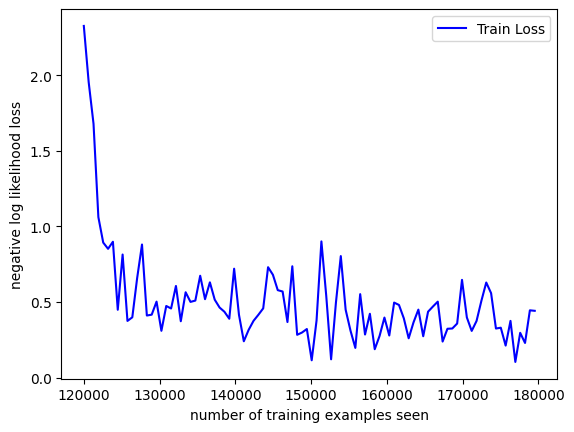

In [70]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')